In [11]:
import pandas as pd
import numpy as np
import pickle

import pandas as pd
import seaborn as sns

# import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
data = pd.read_pickle('all_data.pkl')
data.shape

(95003, 14)

In [13]:
add_stop_words=['app','use','good','just','google','like','work',
                'time','need','dont','make','phone','update'
                ,'im','feature','really']
stop_words1=text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [14]:
#change review to unicode
data['content1']=data['content'].values.astype("U")

In [15]:
cv1=CountVectorizer(stop_words=stop_words1, token_pattern="\\b[a-z][a-z]+\\b",
                    min_df=5,max_df=0.80, max_features=10000,
                    ngram_range=(1,2))#, preprocessor=' '.join)
df_cv1 = cv1.fit_transform(data.content1)
df_review1=pd.DataFrame(df_cv1.toarray(), index= [data.title], columns=cv1.get_feature_names())
#df_review1.shape

In [16]:
cv2 = TfidfVectorizer(stop_words=stop_words1,token_pattern="\\b[a-z][a-z]+\\b", 
                      min_df=3,max_df=0.80, max_features=20000, ngram_range=(1,3))#,preprocessor=' '.join)
df_cv2 = cv2.fit_transform(data.content1)
df_review2=pd.DataFrame(df_cv2.toarray(), index= [data.title], columns=cv2.get_feature_names())
#df_review2.shape

# K-means

In [17]:
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [18]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters,max_iter=300,random_state=10,n_init=1) 
# n_init, number of times the K-mean algorithm will run
km.fit(df_cv2)
#display_cluster(df_cv2,km,num_clusters)

KMeans(n_clusters=5, n_init=1, random_state=10)

In [19]:
data['k_label']=km.labels_

In [137]:
print("Cluster certroids:\n")
order_centroids=km.cluster_centers_.argsort()[:,::-1]
terms=cv2.get_feature_names()

for i in range(num_clusters):
    print('cluster %d:' %i)
    for j in order_centroids[i,:10]:
        print(' %s'% terms[j])
    print('---------------------------')

Cluster certroids:

cluster 0:
 simple
 easy
 simple easy
 add
 great
 calculator
 way
 easy simple
 task
 really
---------------------------
cluster 1:
 listen
 music
 free
 message close
 version open
 music ask
 close music
 service free
 try navigate
 youre listen
---------------------------
cluster 2:
 great
 reinstall
 wish
 watch
 great great
 nice great
 wouldnt
 response
 appreciate
 finally
---------------------------
cluster 3:
 nice
 ok
 love
 great
 doesnt
 best
 add
 fix
 really
 try
---------------------------
cluster 4:
 gud
 upgrade
 nice
 ap
 save image
 bad
 instal
 caller
 apps
 really
---------------------------


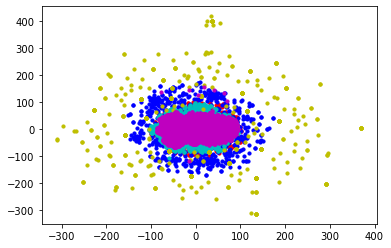

In [145]:
centroids = km.cluster_centers_

tsne_init = 'pca'  # could also be 'random'
tsne_perplexity = 20.0
tsne_early_exaggeration = 4.0
tsne_learning_rate = 1000
model = TSNE(n_components=2, random_state=50, init=tsne_init, perplexity=tsne_perplexity,
         early_exaggeration=tsne_early_exaggeration, learning_rate=tsne_learning_rate)

transformed_centroids = model.fit_transform(centroids)
#print(transformed_centroids)
#plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')


for i in range(num_clusters):    
    points = model.fit_transform(df_cv2.toarray()[y_kmeans==i,:])
    plt.scatter(points[:,0], points[:,1], s=10, 
                c=colors[i], label= 'cluster {}'.format(i))
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=10,c='yellow',label='Centroids')

plt.show()

(array([ 1105.,     0., 89490.,     0.,     0.,  1879.,     0.,   401.,
            0.,  2128.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

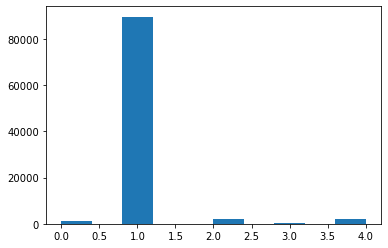

In [20]:
kmean_indices = km.fit_predict(df_cv2)
plt.hist(kmean_indices)

### Elbow method to find out the optimal number of cluster

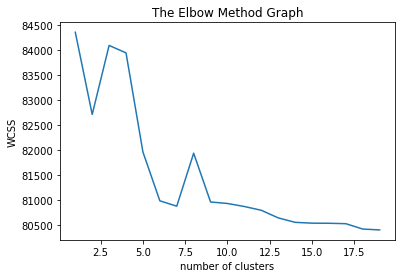

In [25]:
wcss=[]
for i in range(1,20):
    km = KMeans(n_clusters=i,max_iter=300,random_state=10,n_init=1)
    km.fit(df_cv2)
    wcss.append(km.inertia_)

plt.plot(range(1,20),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()